In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from torch.autograd import Variable

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
train_dataset = torchvision.datasets.MNIST(root='../data', train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transforms.ToTensor())

batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
num_inputs = 28*28
num_outputs = 10
num_examples = 60000

In [4]:
def forward(X):
    return torch.mm(X, W).add_(b)

In [5]:
def softmax(X):
    linear = forward(X)
    numerator = torch.exp(linear.sub(linear.max()))
    denominator = numerator.sum()
    return numerator.div(denominator)

In [6]:
def cross_entropy(y, z):
    return -torch.mul(y, torch.log(z)).sum(1).mean()

In [7]:
def one_hot_embedding(labels, num_classes=10):
    return torch.eye(num_classes)[labels] 

In [8]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format})

W = Variable(torch.DoubleTensor(size=(num_inputs, num_outputs)).uniform_(), requires_grad=True)
b = Variable(torch.DoubleTensor(num_outputs).uniform_(), requires_grad=True)

pause = '\n'
epochs = 20
learning_rate = 1e-03
losses = []

for epoch in range(epochs):
    for index, (data, labels) in enumerate(train_loader):
        X = data.contiguous().view(batch_size, num_inputs).double()
        y = one_hot_embedding(labels).double()
        z = softmax(X)
#         print('mean z\n', z.mean(0).data.cpu().numpy())
        l = cross_entropy(y, z)
        losses.append(l)
#         print('cross-entropy\n', l.data.cpu().numpy())
        l.backward()
#         print('weights\n', W.data.cpu().numpy())
        W.data = W.data - learning_rate * W.grad.data
#         print('dl/dw\n', W.grad.data.cpu().numpy())
        W.grad.data.zero_()
#         print('bias\n', b.data.cpu().numpy())
        b.data = b.data - learning_rate * b.grad.data
#         print('dl/db\n', b.grad.data.cpu().numpy())
        b.grad.data.zero_()
#         input(pause)
    print('epoch: ', epoch, ' loss: ', l)
#     break

epoch:  0  loss:  tensor(66.3339, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  1  loss:  tensor(49.3642, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  2  loss:  tensor(39.5662, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  3  loss:  tensor(50.6565, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  4  loss:  tensor(42.4178, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  5  loss:  tensor(38.7105, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  6  loss:  tensor(44.0187, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  7  loss:  tensor(34.9766, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  8  loss:  tensor(35.6221, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  9  loss:  tensor(30.5664, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  10  loss:  tensor(35.0205, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  11  loss:  tensor(29.6170, dtype=torch.float64, grad_fn=<NegBackward>)
epoch:  12  loss:  tensor(24.2549, dtype=torch.float64, grad_f

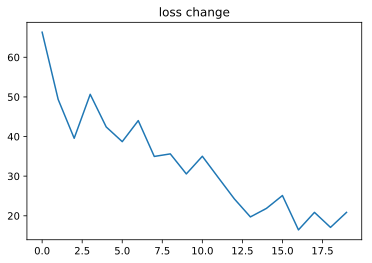

In [14]:
plt.plot(losses);
plt.title('loss change');

In [15]:
preds = []
for index, (data, labels) in enumerate(test_loader):
        X = data.contiguous().view(batch_size, num_inputs).double()
        y = one_hot_embedding(labels).double()
        z = softmax(X)
        l = cross_entropy(y, z)
        preds.append(l)
print('mean loss by test batches: ', (sum(preds)/len(preds)).detach().numpy())

mean loss by test batches:  15.280765974022726


		 label:  1


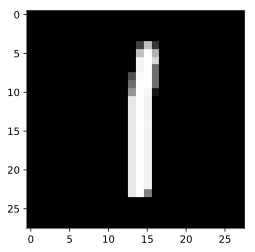

		 (28, 28) px


,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
ix = np.random.randint(60000)
print('\t\t', 'label: ', train_dataset.train_labels[ix].item())
image = train_dataset.train_data[ix]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('\t\t', image.shape, 'px')

ixs = train_loader.dataset.train_data[ix].view(1, num_inputs).double()
s = (softmax(ixs)*10).int().float()/10
pd.DataFrame(s.numpy())